ASSIGNMENT : SOLAR ENERGY DATASET 

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("solar_Weather.xlsx")
df.head()

,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
0,2017-01-01 00:00:00,0,0,1.6,0,100,450
1,2017-01-01 00:15:00,0,0,1.6,0,100,450
2,2017-01-01 00:30:00,0,0,1.6,0,100,450
3,2017-01-01 00:45:00,0,0,1.6,0,100,450
4,2017-01-01 01:00:00,0,0,1.7,0,100,450


In [149]:
df.shape

(196777, 9)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196777 entries, 0 to 196776
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Time                        196769 non-null  datetime64[ns]
 1   Energy Captured[Wh]         196773 non-null  float64       
 2   Sun Light Intensity (W/m2)  196770 non-null  float64       
 3   Temperature                 196771 non-null  float64       
 4   1 Hour Rain Fall            196773 non-null  float64       
 5   Cloud Coverage              196764 non-null  float64       
 6   Length of Day_Light         196772 non-null  float64       
 7   month                       196769 non-null  float64       
 8   year                        196769 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 13.5 MB


CONVERTING DATA TYPES FOR SPECIFIC COLUMNS

In [151]:
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

numerical_columns = [ "Energy Captured[Wh]", "Sun Light Intensity (W/m2)", "Temperature", "1 Hour Rain Fall", "Cloud Coverage", "Length of Day_Light"]

df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors="coerce")


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196777 entries, 0 to 196776
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Time                        196769 non-null  datetime64[ns]
 1   Energy Captured[Wh]         196773 non-null  float64       
 2   Sun Light Intensity (W/m2)  196770 non-null  float64       
 3   Temperature                 196771 non-null  float64       
 4   1 Hour Rain Fall            196773 non-null  float64       
 5   Cloud Coverage              196764 non-null  float64       
 6   Length of Day_Light         196772 non-null  float64       
 7   month                       196769 non-null  float64       
 8   year                        196769 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 13.5 MB


In [153]:
df.isna().sum()

Time                           8
Energy Captured[Wh]            4
Sun Light Intensity (W/m2)     7
Temperature                    6
1 Hour Rain Fall               4
Cloud Coverage                13
Length of Day_Light            5
month                          8
year                           8
dtype: int64

In [154]:
df[df["Time"].isnull()]

,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light,month,year
355,NaT,0.0,0.0,0.3,0.0,71.0,465.0,NaN,NaN
402,NaT,0.0,0.0,-2.5,0.0,55.0,465.0,NaN,NaN
583,NaT,0.0,0.0,2.3,0.0,96.0,465.0,NaN,NaN
638,NaT,0.0,0.0,1.9,0.0,47.0,465.0,NaN,NaN
666,NaT,0.0,0.0,0.8,0.0,100.0,465.0,NaN,NaN
716,NaT,123.0,8.8,0.1,0.0,97.0,465.0,NaN,NaN
801,NaT,56.0,6.6,-2.4,0.0,86.0,480.0,NaN,NaN
933,NaT,0.0,0.0,-0.2,0.0,61.0,480.0,NaN,NaN


Forward filling with Previous Dates and Adding 15 Minutes 

In [155]:
df['Time'] = df['Time'].fillna(method='ffill') + pd.to_timedelta( df['Time'].isna().cumsum() * 15, unit='min')

C:\Users\renuk\AppData\Local\Temp\ipykernel_12640\2573793748.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Time'] = df['Time'].fillna(method='ffill') + pd.to_timedelta( df['Time'].isna().cumsum() * 15, unit='min')


Dropping the rows where Energy Captured is Null,because it is a target

In [156]:
df = df.dropna(subset=['Energy Captured[Wh]'])

FORWARD FILLING THE REMAINING NULL VALUES OF A PARTICULAR COLUMNS

In [157]:
weather_cols = [ 'Sun Light Intensity (W/m2)', 'Temperature','1 Hour Rain Fall','Cloud Coverage', 'Length of Day_Light']
df[weather_cols] = df[weather_cols].ffill()

In [158]:
df.isna().sum()

Time                          0
Energy Captured[Wh]           0
Sun Light Intensity (W/m2)    0
Temperature                   0
1 Hour Rain Fall              0
Cloud Coverage                0
Length of Day_Light           0
month                         8
year                          8
dtype: int64

Duplicate Rows based on Time

In [159]:
df[df.duplicated(subset=['Time'], keep=False)]

,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light,month,year
138,2017-01-02 10:30:00,101.0,5.3,2.2,0.0,79.0,450.0,1.0,2017.0
139,2017-01-02 10:30:00,101.0,5.3,2.2,0.0,79.0,450.0,1.0,2017.0


REMOVE DUPLICATE BASED ON TIME, BECAUSE TIME APPEARS ONLY ONCE BASED ON 15 MINUTE INTERVAL

In [160]:
df = df.drop_duplicates(subset=['Time'], keep='first')

Number of TIMESTAMPS ARE MISSING 

In [161]:
df = df.sort_values('Time')
df = df.set_index('Time')

expected_time = pd.date_range( start=df.index.min(), end=df.index.max(), freq='15min')

missing_timestamps = expected_time.difference(df.index)

print("No of missing timestamps:", len(missing_timestamps))
missing_timestamps


No of missing timestamps: 1836


DatetimeIndex(['2017-01-04 16:45:00', '2017-01-05 00:15:00',
               '2017-01-05 00:30:00', '2017-01-05 00:45:00',
               '2017-01-05 01:00:00', '2017-01-05 01:15:00',
               '2017-01-05 01:30:00', '2017-01-05 01:45:00',
               '2017-01-05 02:00:00', '2017-01-05 02:15:00',
               ...
               '2022-02-20 23:30:00', '2022-02-20 23:45:00',
               '2022-02-21 00:00:00', '2022-02-21 00:15:00',
               '2022-02-21 00:30:00', '2022-02-21 00:45:00',
               '2022-02-21 01:00:00', '2022-02-21 01:15:00',
               '2022-02-21 01:30:00', '2022-02-21 01:45:00'],
              dtype='datetime64[ns]', length=1836, freq=None)

In [101]:
df.describe()

,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
count,196772.000000,196772.000000,196772.000000,196772.000000,196772.000000,196772.000000
mean,573.013660,32.598073,9.790741,0.066036,65.971962,748.649884
std,1044.834501,52.175264,7.995331,0.278916,36.636927,194.868311
min,-54.000000,0.000000,-16.600000,0.000000,-250.000000,450.000000
25%,0.000000,0.000000,3.600000,0.000000,34.000000,570.000000
50%,0.000000,1.600000,9.300000,0.000000,82.000000,765.000000
75%,577.000000,46.800000,15.700000,0.000000,100.000000,930.000000
max,5020.000000,270.000000,35.800000,8.090000,101.000000,1020.000000


In [162]:
columns = ['Energy Captured[Wh]', 'Sun Light Intensity (W/m2)','Temperature','1 Hour Rain Fall','Cloud Coverage','Length of Day_Light']
corr_matrix = df[columns].corr()


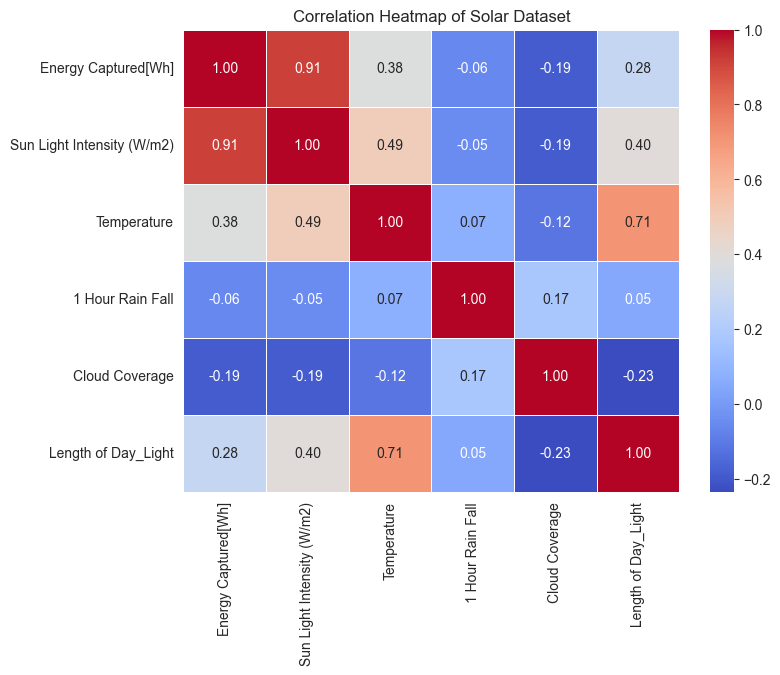

In [163]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Solar Dataset")
plt.show()


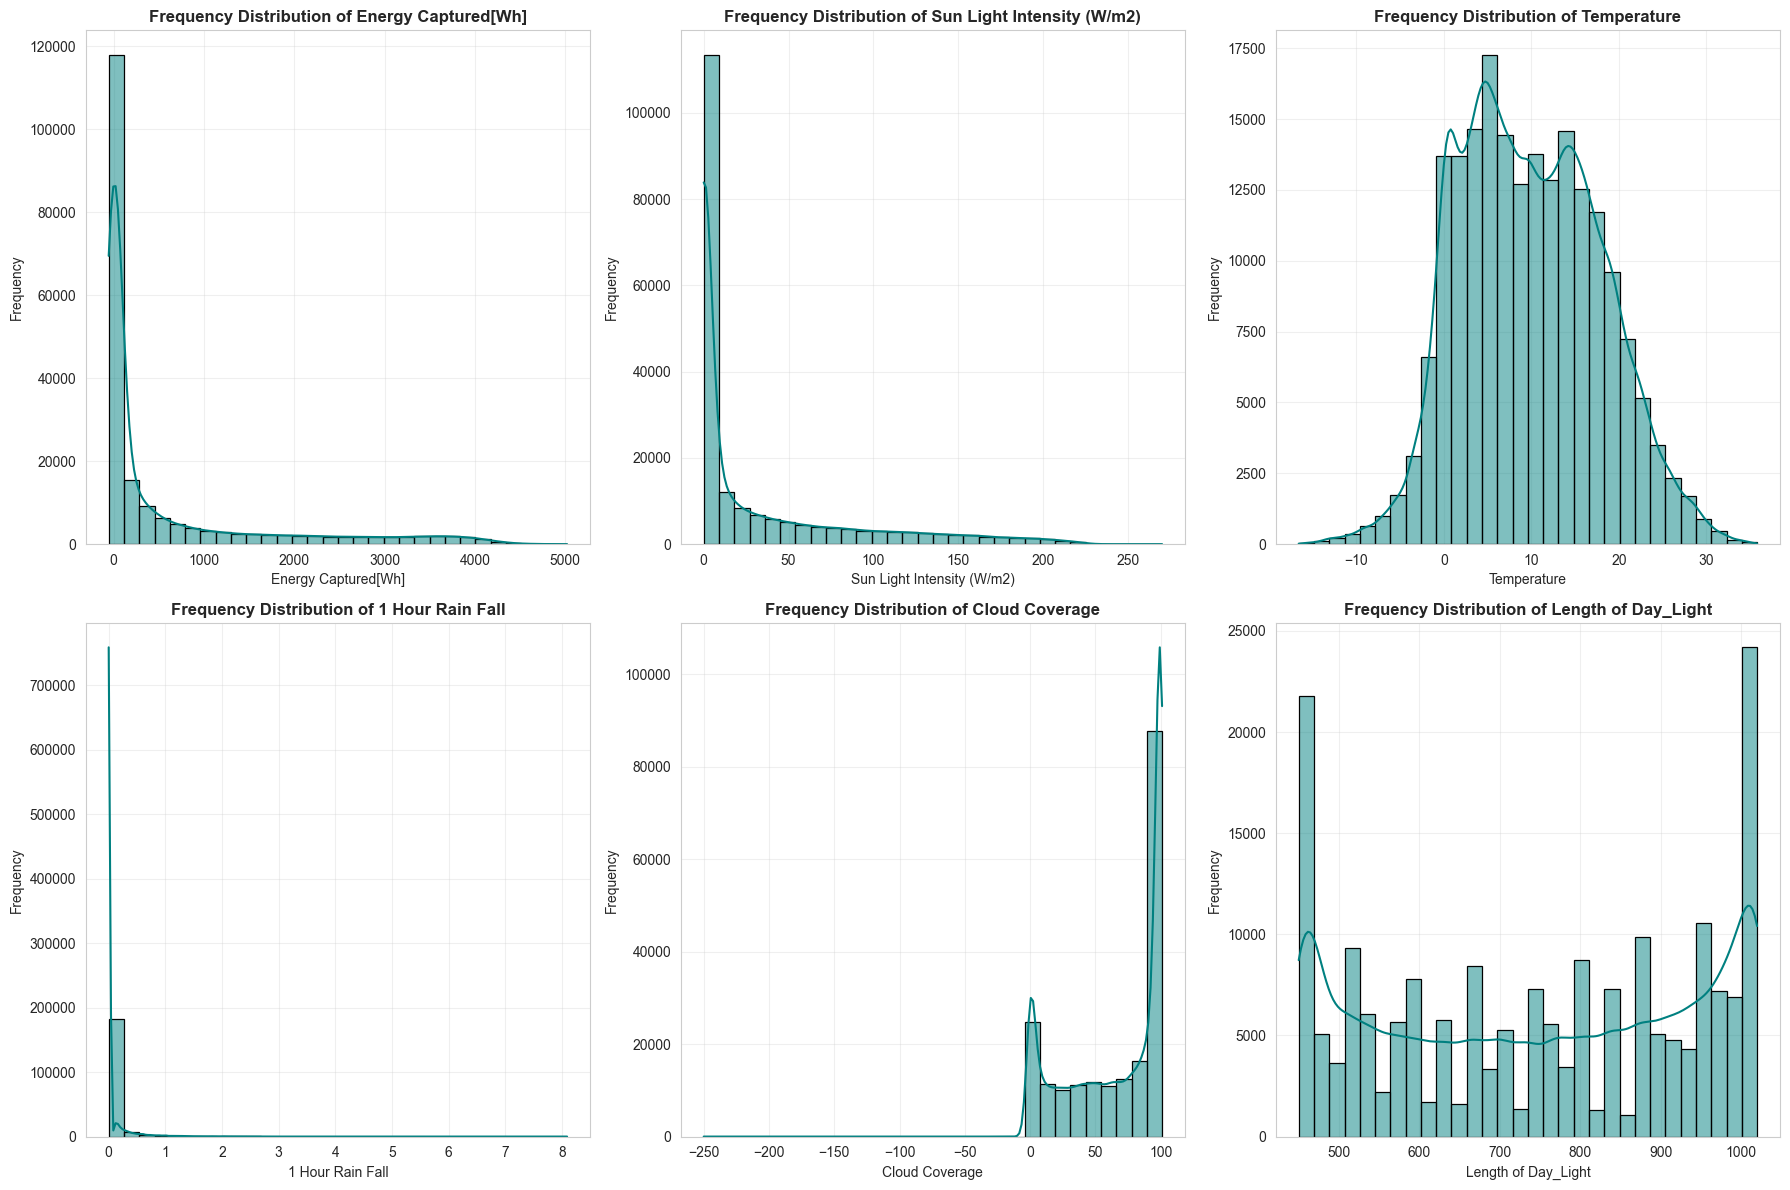

In [104]:
import math

num_cols = len(df.columns)
cols_per_row = 3
rows = math.ceil(num_cols / cols_per_row)

plt.figure(figsize=(18, 6 * rows))  

for i, col in enumerate(df.columns):
    plt.subplot(rows, cols_per_row, i + 1) 
    sns.histplot(df[col], kde=True, bins=30, color='teal', edgecolor='black')
    plt.title(f'Frequency Distribution of {col}', fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(alpha=0.3)

plt.tight_layout() 
plt.show()


CHECKING OUTLIERS

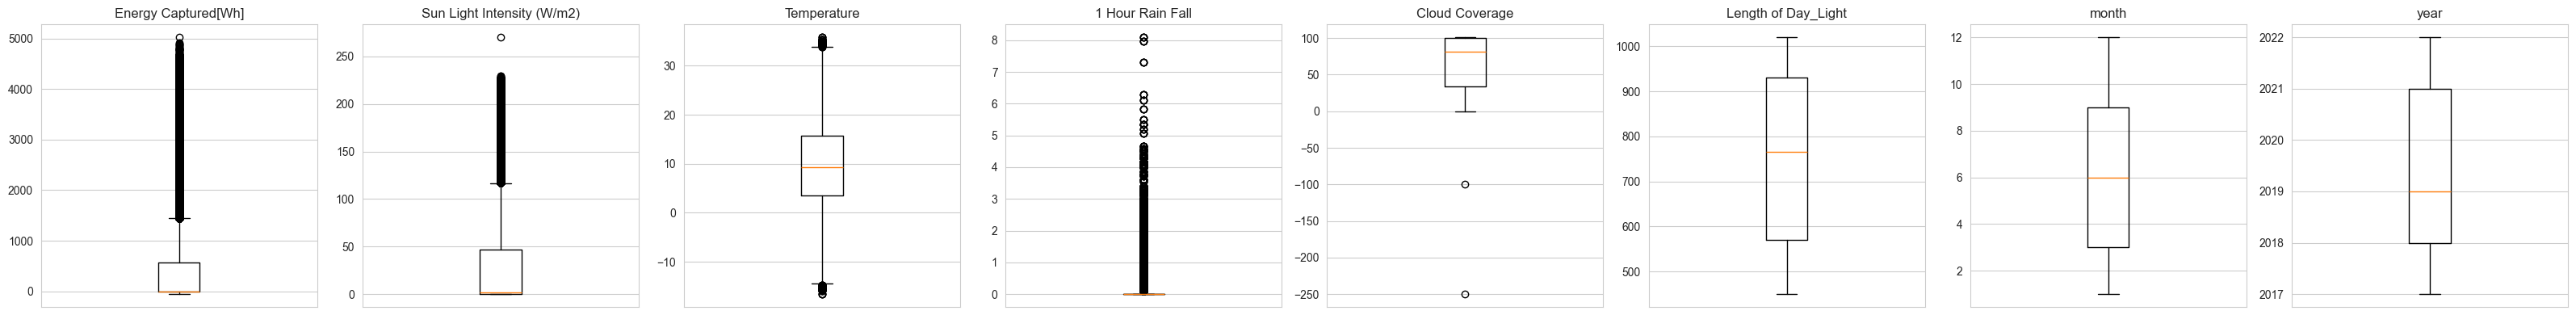

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['number']).columns

n = len(numeric_cols)
fig, axes = plt.subplots(1, n, figsize=(4*n, 4))

if n == 1:
    axes = [axes]

for ax, col in zip(axes, numeric_cols):
    ax.boxplot(df[col].dropna())
    ax.set_title(col)
    ax.set_xticks([])

plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(df["Cloud Coverage"].dropna()))
outliers_bool = z_scores > 3

outliers_full = pd.Series(False, index=df.index)
outliers_full.loc[df["Cloud Coverage"].dropna().index] = outliers_bool

df_cloud_outliers = df[outliers_full]

df_cloud_outliers

,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,Cloud Coverage,Length of Day_Light
24,0.0,0.0,2.8,-250.0,450.0
91,0.0,0.0,2.8,-100.0,450.0


DROPPING ROWS WHERE CLOUD COVERAGE IS NEGATIVE

In [165]:
df[df['Cloud Coverage'] >= 0]

,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light,month,year
Time,,,,,,,,
2017-01-01 00:00:00,0.0,0.0,1.6,0.0,100.0,450.0,1.0,2017.0
2017-01-01 00:15:00,0.0,0.0,1.6,0.0,100.0,450.0,1.0,2017.0
2017-01-01 00:30:00,0.0,0.0,1.6,0.0,100.0,450.0,1.0,2017.0
2017-01-01 00:45:00,0.0,0.0,1.6,0.0,100.0,450.0,1.0,2017.0
2017-01-01 01:00:00,0.0,0.0,1.7,0.0,100.0,450.0,1.0,2017.0
...,...,...,...,...,...,...,...,...
2022-08-31 18:45:00,118.0,23.7,18.6,0.0,52.0,825.0,8.0,2022.0
2022-08-31 19:00:00,82.0,15.6,18.5,0.0,60.0,825.0,8.0,2022.0
2022-08-31 19:15:00,51.0,8.0,18.5,0.0,60.0,825.0,8.0,2022.0


FEATURE ENGINEERING : TIME BASED 

In [ ]:
df['hour'] = df.index.hour             
df['month'] = df.index.month     



In [111]:
df = df.reset_index(drop=True)

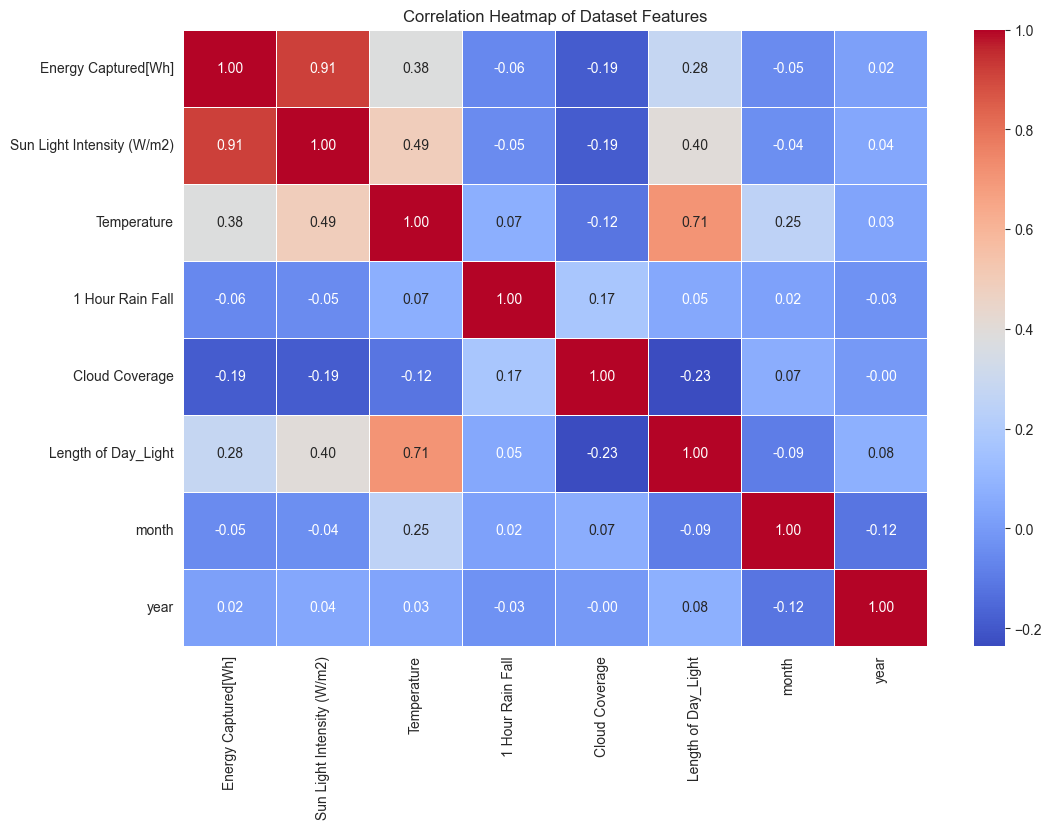

In [166]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)

plt.title("Correlation Heatmap of Dataset Features")
plt.show()


In [171]:
df = df.dropna(subset=['month', 'year'])


BUILDING A REGRESSION MODEL

In [172]:
target = 'Energy Captured[Wh]'
X = df.drop(columns=[target])
y = df[target]

TRAIN TEST SPLIT WITH RATIO OF 0.2

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

STANDARDIZING AND EVALUATING THE MODEL PERFORMANCE

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest R²: 0.9496860604495524
Random Forest RMSE: 235.92416494526384


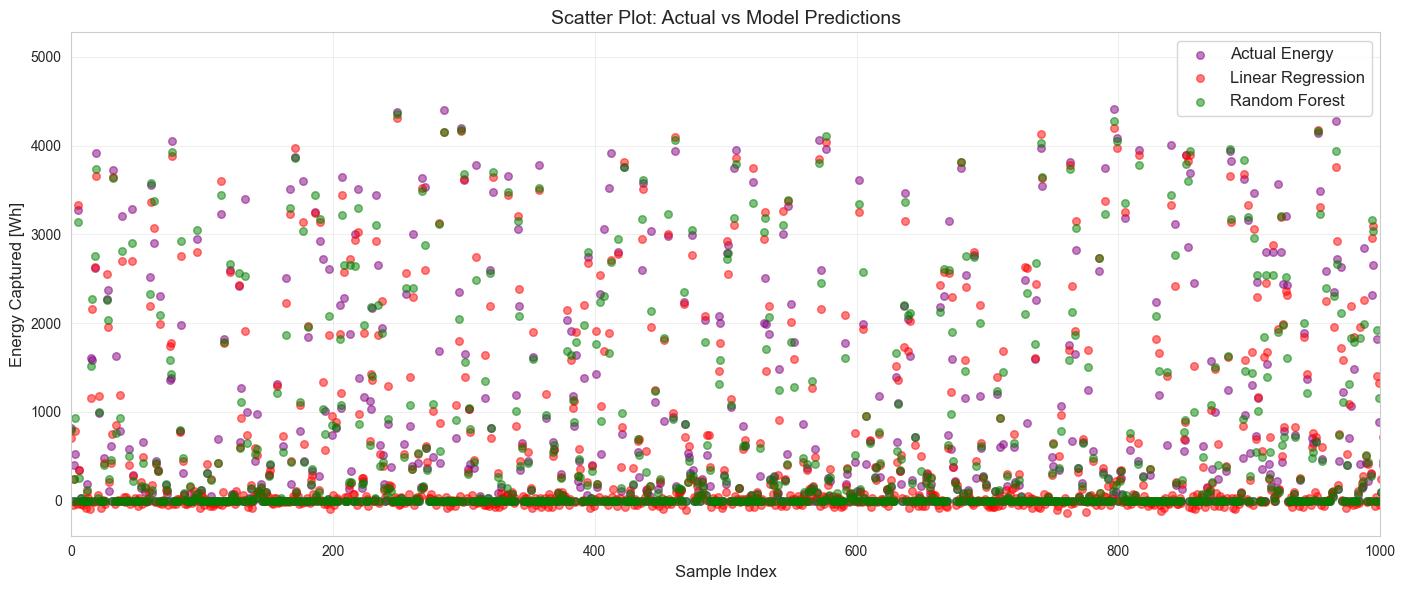

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(14,6))

plt.scatter(range(len(y_test)), y_test, label='Actual Energy', color='purple', alpha=0.5, s=30)

plt.scatter(range(len(y_test)), y_pred_lr, label='Linear Regression', color='red', alpha=0.5, s=30)

plt.scatter(range(len(y_test)), y_pred_rf, label='Random Forest', color='green', alpha=0.5, s=30)

plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Energy Captured [Wh]', fontsize=12)
plt.title('Scatter Plot: Actual vs Model Predictions', fontsize=14)

plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.xlim(0, 1000)

plt.show()


CALCULATING ALL THE JANUARY MONTH ENERGY PRODUCTION FROM ALL THE PREVIOUS YEARS

In [145]:
df['month'] = df['Time'].dt.month
df['year'] = df['Time'].dt.year

jan_data = df[df['month'] == 1]

jan_averages = jan_data.groupby('year')['Energy Captured[Wh]'].mean().reset_index()

print(jan_averages)


     year  Energy Captured[Wh]
0  2017.0           180.443685
1  2018.0           125.400000
2  2019.0           117.248992
3  2020.0           122.447245
4  2021.0            83.167339
5  2022.0           161.141204


PREDICTING THE JAN 2026 ENERGY CAPTURED BASED ON PREVIOUS DATA

In [147]:
df_january = df[df['month'] == 1]

avg_features = df_january[['Sun Light Intensity (W/m2)', 'Temperature','Cloud Coverage', 'Length of Day_Light']].mean()
print(avg_features)


Sun Light Intensity (W/m2)      5.501902
Temperature                     1.281548
Cloud Coverage                 79.309745
Length of Day_Light           486.794170
dtype: float64


In [ ]:
forecast_jan_2026 = pd.DataFrame({
    'Sun Light Intensity (W/m2)': [5.501943],
    'Temperature': [1.293498],                                
    'Cloud Coverage': [79.317491],               
    'Length of Day_Light': [486.545053]       
})

forecast_rf = rf.predict(forecast_jan_2026)[0]

In [ ]:
forecast_row = pd.DataFrame({
    'year': [2026],
    'Energy Captured[Wh]': [forecast_rf]
})

jan_averages = pd.concat([jan_averages, forecast_row], ignore_index=True)

print(jan_averages)


   year  Energy Captured[Wh]
0  2017           180.547686
1  2018           125.400000
2  2019           117.248992
3  2020           122.447245
4  2021            83.167339
5  2022           161.141204
6  2026           131.170000
